In [2]:
import torch
from torch import nn

torch.__version__

'2.2.0.dev20230922+cu121'

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
!nvidia-smi

Fri Oct 13 21:08:43 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.99                 Driver Version: 536.99       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1080 Ti   WDDM  | 00000000:07:00.0  On |                  N/A |
| 40%   62C    P0              66W / 250W |   1585MiB / 11264MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [9]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"
if not image_path.is_dir():
    image_path.mkdir(parents=True, exist_ok=True)
else:
    print(f"{image_path} directory exists, skipping folder creation.")
    pass

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading data...")
    f.write(request.content)
    print("Data downloaded...")

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Extracting data...")
    zip_ref.extractall(image_path)
    print("Data extracted...")


data\pizza_steak_sushi directory exists, skipping download.
Data downloaded...
Extracting data...
Data extracted...


In [12]:
import os

def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [13]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

Random Image Path: data\pizza_steak_sushi\train\pizza\2291093.jpg
Image class: pizza
Image mode: RGB
Image size: (512, 512)


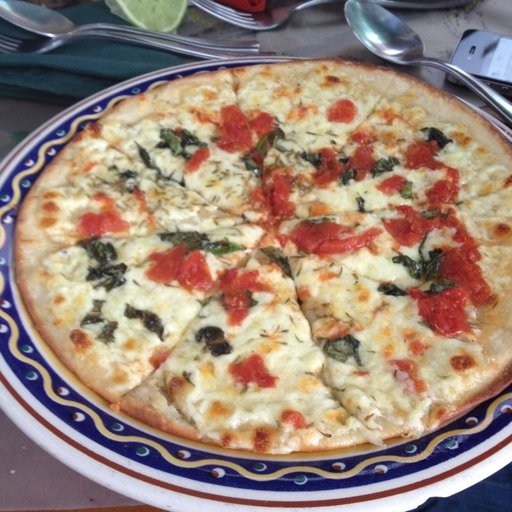

In [38]:
import random 
from PIL import Image

# random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
random_image_path

image_class = random_image_path.parent.name


img = Image.open(random_image_path)

print(f"Random Image Path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image mode: {img.mode}")
print(f"Image size: {img.size}")
img

Image Class: pizza | Shape: (512, 512, 3) | Data Type: uint8


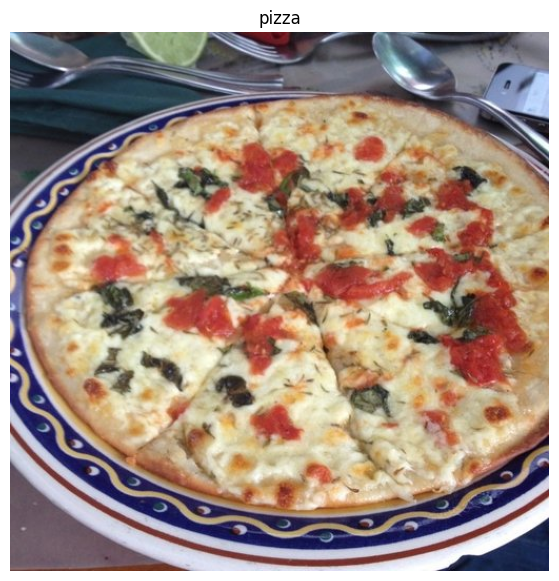

In [40]:
import numpy as np
import matplotlib.pyplot as plt

image_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(image_as_array)
plt.title(image_class)
plt.axis(False);
print(f"Image Class: {image_class} | Shape: {image_as_array.shape} | Data Type: {image_as_array.dtype}")